In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models
import os
import spacy 
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel, TfidfModel
import string
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,text_lemm_clean,back_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,"['планировать', 'открывать', 'счет', 'банк', '...",планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,"['ситуация', 'рб', 'числиться', 'тунеядец', 'п...",ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,"['выполнять', 'комплекс', 'строительный', 'пом...",выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,"['енное', 'жкх', 'присылать', 'справка', 'поль...",енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,"['раздумье', 'полициальный', 'выбирать', 'star...",раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,"['происходить', 'неприятный', 'ситуация', 'авт...",происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,"['тересполь', 'брест', 'автобус', 'ездить', 'м...",тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,"['прививать', 'covid', 'желательно', 'pfizer',...",прививать covid желательно pfizer ом родитель ...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,"['добрага', 'шаноўныя', 'нехт', 'працуй', 'тур...",добрага шаноўныя нехт працуй турыстычный агенц...


In [ ]:
lemm_texts_list = df['back_lemm'] 

In [ ]:
lemm_texts_list 

0       планировать открывать счет банк pko начисление...
1       ситуация рб числиться тунеядец предоставлять п...
2       выполнять комплекс строительный помещение пека...
3       енное жкх присылать справка польский налоговый...
4       раздумье полициальный выбирать start центр вар...
                              ...                        
5627    происходить неприятный ситуация автовокзал зах...
5628    тересполь брест автобус ездить маршрутка приез...
5629    прививать covid желательно pfizer ом родитель ...
5630    добрага шаноўныя нехт працуй турыстычный агенц...
5631    оформлять доверенность поехать польша рб знако...
Name: back_lemm, Length: 5632, dtype: object

In [ ]:
len(lemm_texts_list)

5632

In [ ]:
# cast posts to numpy array
def tokenize(text):
    words = [word.strip(string.punctuation).lower() for word in text.split()]
    #words = [word for word in words if word and word not in stops]
    
    return words

In [ ]:
norm_texts = [tokenize(text) for text in lemm_texts_list]

In [ ]:
norm_texts

[['планировать',
  'открывать',
  'счет',
  'банк',
  'pko',
  'начисление',
  'зп',
  'отделение',
  'pko',
  'варшава',
  'русскоговорящий'],
 ['ситуация', 'рб', 'числиться', 'тунеядец', 'предоставлять', 'подтверждать'],
 ['выполнять',
  'комплекс',
  'строительный',
  'помещение',
  'пекарня',
  'бетонный',
  'малярный',
  'штукат'],
 ['енное',
  'жкх',
  'присылать',
  'справка',
  'польский',
  'налоговый',
  'подтверждать',
  'уплата',
  'налог',
  'территория',
  'рп',
  'справка',
  'ситуация',
  'рб',
  'числиться',
  'тунеядец',
  'предоставлять',
  'подтверждать'],
 ['раздумье',
  'полициальный',
  'выбирать',
  'start',
  'центр',
  'варшава',
  'приглашать',
  'желающий',
  'бесплатный',
  'обучение',
  'учиться',
  'муж'],
 ['посоветовать', 'тв', 'пакет', 'желательно'],
 ['студент', 'пересечение', 'граница', 'экспресс', 'пцр', 'тест', 'ответ'],
 ['польский',
  'требоваться',
  'декларант',
  'помощник',
  'декларант',
  'клиент',
  'прием',
  'обработка',
  'дежурство',
 

In [ ]:
#pip install git+https://github.com/rwalk/gsdmm.git

In [ ]:
dic = gensim.corpora.Dictionary(norm_texts)

In [ ]:
print(f'Size of dictionary before filter: {len(dic)}')

Size of dictionary before filter: 18285


In [ ]:
dic.filter_extremes(no_below = 15, no_above = 0.5)

In [ ]:
bow_corpus =[dic.doc2bow(doc) for doc in norm_texts]

In [ ]:
vocab_length = len(dic)

In [ ]:
print(dic)

Dictionary<911 unique tokens: ['pko', 'банк', 'варшава', 'зп', 'открывать']...>


In [ ]:
vocab_length

911

In [ ]:
from gsdmm import MovieGroupProcess
# initialize GSDMM
gsdmm = MovieGroupProcess(K=15, alpha=0.3, beta=1.3, n_iters=15)
# fit GSDMM model
y = gsdmm.fit(norm_texts, vocab_length)

In stage 0: transferred 4939 clusters with 15 clusters populated
In stage 1: transferred 3038 clusters with 15 clusters populated
In stage 2: transferred 1603 clusters with 15 clusters populated
In stage 3: transferred 1172 clusters with 15 clusters populated
In stage 4: transferred 1078 clusters with 15 clusters populated
In stage 5: transferred 1044 clusters with 15 clusters populated
In stage 6: transferred 1022 clusters with 15 clusters populated
In stage 7: transferred 1023 clusters with 15 clusters populated
In stage 8: transferred 1051 clusters with 15 clusters populated
In stage 9: transferred 1012 clusters with 15 clusters populated
In stage 10: transferred 989 clusters with 15 clusters populated
In stage 11: transferred 944 clusters with 15 clusters populated
In stage 12: transferred 930 clusters with 15 clusters populated
In stage 13: transferred 913 clusters with 15 clusters populated
In stage 14: transferred 939 clusters with 15 clusters populated


In [ ]:
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Number of documents per topic : [290 656 236 141 473 331 402 353 348 463 237 162 806 288 446]
Most important clusters (by number of docs inside): [12  1  4  9 14  6  7  8  5  0 13 10  2 11  3]


In [ ]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)


Cluster 12 : [('виза', 601), ('польша', 364), ('беларусь', 213), ('рб', 204), ('приглашение', 164), ('паспорт', 155), ('граница', 147), ('карта', 135), ('выезжать', 132), ('польский', 126), ('гуманитарный', 104), ('рабочий', 101), ('информация', 85), ('заканчиваться', 78), ('побыт', 77), ('находиться', 74), ('варшава', 71), ('месяц', 68), ('поляк', 67), ('приезжать', 67)]

Cluster 1 : [('варшава', 345), ('ехать', 280), ('минск', 221), ('польша', 174), ('граница', 129), ('беларусь', 113), ('передавать', 94), ('рб', 91), ('брест', 89), ('автобус', 77), ('близкий', 69), ('тест', 58), ('карантин', 56), ('гродно', 55), ('авто', 46), ('завтра', 46), ('ездить', 46), ('прививка', 45), ('передача', 45), ('пцр', 44)]

Cluster 4 : [('банк', 136), ('польский', 133), ('карта', 127), ('польша', 126), ('рб', 109), ('счет', 100), ('беларусь', 81), ('перевод', 77), ('варшава', 56), ('номер', 55), ('авто', 52), ('открывать', 50), ('сталкиваться', 42), ('переводить', 41), ('помогать', 40), ('поделиться'

In [ ]:
# Import wordcloud and matplotlib libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Get topic word distributions from gsdmm model
cluster_word_distribution = gsdmm.cluster_word_distribution

(-0.5, 1899.5, 849.5, -0.5)

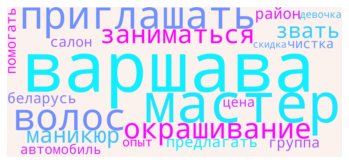

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict0 = sorted(cluster_word_distribution[0].items(), key=lambda k: k[1], reverse=True)[:20]

# Generate a word cloud image
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict0))
fig, ax = plt.subplots(figsize = [6,6])

plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

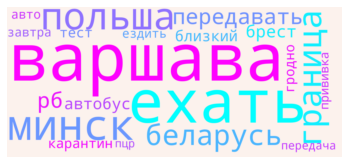

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict1 = sorted(cluster_word_distribution[1].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict1))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

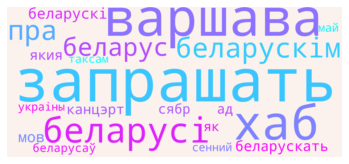

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict2 = sorted(cluster_word_distribution[2].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict2))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

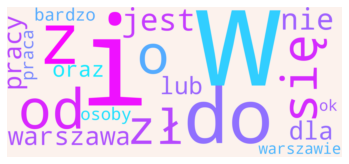

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict3 = sorted(cluster_word_distribution[3].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict3))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 949.5, -0.5)

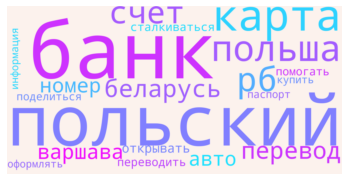

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict4= sorted(cluster_word_distribution[4].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=950,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict4))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

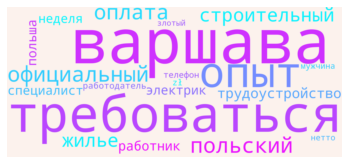

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict5= sorted(cluster_word_distribution[5].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict5))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

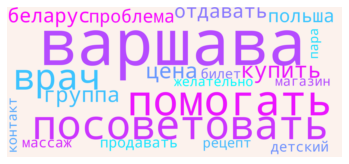

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict6= sorted(cluster_word_distribution[6].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict6))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

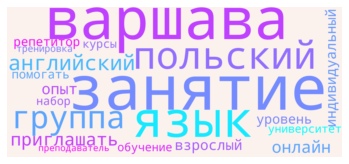

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict7= sorted(cluster_word_distribution[7].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict7))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

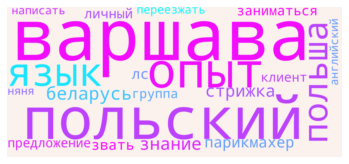

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict8= sorted(cluster_word_distribution[8].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict8))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

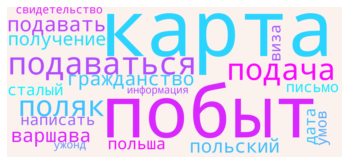

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict9= sorted(cluster_word_distribution[9].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict9))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

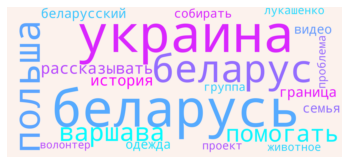

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict10= sorted(cluster_word_distribution[10].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict10))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

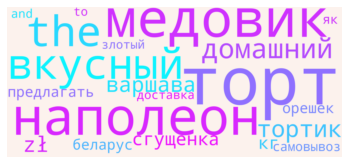

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict11= sorted(cluster_word_distribution[11].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict11))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

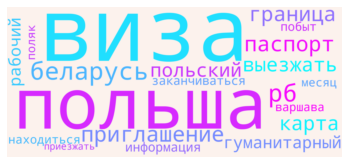

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict12= sorted(cluster_word_distribution[12].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict12))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

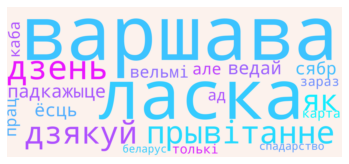

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict13= sorted(cluster_word_distribution[13].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict13))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

(-0.5, 1899.5, 849.5, -0.5)

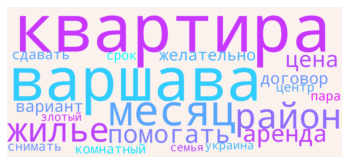

In [ ]:
# Select topic you want to output as dictionary (using topic_number)
topic_dict14= sorted(cluster_word_distribution[14].items(), key=lambda k: k[1], reverse=True)[:20]
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1900,
                            height=850,
                            #font_path=path_to_font,
                            colormap='cool').generate_from_frequencies(dict(topic_dict14))

fig, ax = plt.subplots(figsize = [6,6])
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

In [ ]:
#source
#https://gist.github.com/rrpelgrim/c5e72bd0654d10a875ebeb6715869a95#file-gsdmm-coherence-score-py

In [ ]:
# import library from gensim  
from gensim.models import CoherenceModel

# define function to get words in topics
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

# get topics to feed to coherence model
topics = get_topics_lists(gsdmm, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dic, 
                          corpus=bow_corpus, 
                          texts=norm_texts, 
                          coherence='c_v')


In [ ]:
# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dic, 
                          corpus=bow_corpus, 
                          texts=norm_texts, 
                          coherence='c_v')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()  

print(coherence_gsdmm)

0.5063122814131021


In [ ]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,text_lemm_clean,back_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,"['планировать', 'открывать', 'счет', 'банк', '...",планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,"['ситуация', 'рб', 'числиться', 'тунеядец', 'п...",ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,"['выполнять', 'комплекс', 'строительный', 'пом...",выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,"['енное', 'жкх', 'присылать', 'справка', 'поль...",енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,"['раздумье', 'полициальный', 'выбирать', 'star...",раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,"['происходить', 'неприятный', 'ситуация', 'авт...",происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,"['тересполь', 'брест', 'автобус', 'ездить', 'м...",тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,"['прививать', 'covid', 'желательно', 'pfizer',...",прививать covid желательно pfizer ом родитель ...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,"['добрага', 'шаноўныя', 'нехт', 'працуй', 'тур...",добрага шаноўныя нехт працуй турыстычный агенц...


In [ ]:
topic_dict = {}
topic_names = ['type 0',
               'type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
               'type 7',
               'type 8',
               'type 9',
               'type 10',
               'type 11',
               'type 12',
               'type 13',
               'type 14'
              ]
              
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]  

In [ ]:
def create_topics_dataframe(data_text=df.postfs, date = df.date, mgp=gsdmm, threshold=0.3, topic_dict=topic_dict, lemma_text=norm_texts):
    result = pd.DataFrame(columns=['Text', 'Date','Topic',  'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        result.at[i, 'Lemma-text'] = lemma_text[i]
        result.at[i, 'Date'] = df.date[i]
        prob = mgp.choose_best_label(norm_texts [i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [ ]:
result = create_topics_dataframe(data_text=df.postfs,  mgp=gsdmm, threshold=0.3, topic_dict=topic_dict, lemma_text=norm_texts )
result.head(25)

,Text,Date,Topic,Lemma-text
0,Здравствуйте! Планирую открыть счёт в банке PK...,2022-01-03,type 2,"[планировать, открывать, счет, банк, pko, начи..."
1,Всем привет. Может у кого-то из вас была такая...,2022-01-03,type 3,"[ситуация, рб, числиться, тунеядец, предоставл..."
2,Кто может выполнить комплекс строительных рабо...,2022-01-03,type 8,"[выполнять, комплекс, строительный, помещение,..."
3,"енно). Вообще, человек из жкх сказал, что обыч...",2022-01-03,type 3,"[енное, жкх, присылать, справка, польский, нал..."
4,"Кто еще в раздумьях и не знает, какую полициал...",2022-01-04,type 6,"[раздумье, полициальный, выбирать, start, цент..."
5,"Здравствуйте, ребята посоветуйте пожалуйста ТВ...",2022-01-04,type 4,"[посоветовать, тв, пакет, желательно]"
6,"Здравствуйте! Подскажите пожалуйста, студентам...",2022-01-04,type 1,"[студент, пересечение, граница, экспресс, пцр,..."
7,"Польской компании требуется декларант, помощни...",2022-01-04,type 8,"[польский, требоваться, декларант, помощник, д..."
8,"Добрый день. Ищем человека или бригаду, которы...",2022-01-04,type 8,"[бригада, смочь, косметический, квартира, квар..."
9,"Всем привет. Может кто знает, можно ли где-то ...",2022-01-05,type 3,"[телефон, рат, карта, побыт, кредит, банк, умо..."


In [ ]:
result.to_csv(r'C:\Users\dell\Desktop\pliki\result_topics_gsdmm.csv', encoding = 'utf-8',  index = False)

In [ ]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\result_topics_gsdmm.csv')
df

,Text,Date,Topic,Lemma-text
0,Здравствуйте! Планирую открыть счёт в банке PK...,2022-01-03,type 2,"['планировать', 'открывать', 'счет', 'банк', '..."
1,Всем привет. Может у кого-то из вас была такая...,2022-01-03,type 3,"['ситуация', 'рб', 'числиться', 'тунеядец', 'п..."
2,Кто может выполнить комплекс строительных рабо...,2022-01-03,type 8,"['выполнять', 'комплекс', 'строительный', 'пом..."
3,"енно). Вообще, человек из жкх сказал, что обыч...",2022-01-03,type 3,"['енное', 'жкх', 'присылать', 'справка', 'поль..."
4,"Кто еще в раздумьях и не знает, какую полициал...",2022-01-04,type 6,"['раздумье', 'полициальный', 'выбирать', 'star..."
...,...,...,...,...
5627,"Здравствуйте, произошла очень неприятная ситуа...",2022-07-21,type 1,"['происходить', 'неприятный', 'ситуация', 'авт..."
5628,"Подскажите пожалуйста,из Тересполя в Брест,кро...",2022-07-21,type 1,"['тересполь', 'брест', 'автобус', 'ездить', 'м..."
5629,"Добрый день, кто-нибудь знает, можно ли привит...",2022-07-21,type 0,"['прививать', 'covid', 'желательно', 'pfizer',..."
5630,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",2022-07-21,type 10,"['добрага', 'шаноўныя', 'нехт', 'працуй', 'тур..."


In [ ]:
topic_count = result['Topic'].value_counts()
topic_count

type 0     812
type 1     653
type 2     465
type 3     463
type 4     442
type 5     414
type 6     351
type 7     347
type 8     326
type 10    288
type 9     285
type 12    236
type 11    235
type 13    159
type 14    140
Other       16
Name: Topic, dtype: int64

<AxesSubplot:>

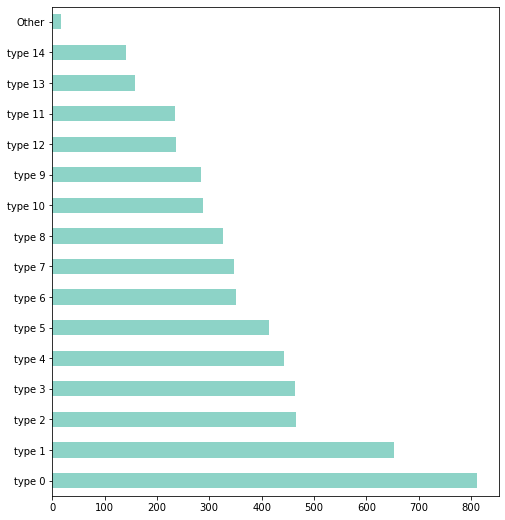

In [ ]:
topic_count.plot(kind='barh',label='Play Count',figsize=(8,9),colormap='Set3')

In [ ]:
type0 = df[df['Topic']=='type 0']

In [ ]:
type0

,Text,Date,Topic,Lemma-text
14,Добрый день. Подскажите пожалуйста по прежнему...,2022-01-05,type 0,"['прежний', 'пересекать', 'граница', 'польша',..."
27,"Добрый вечер. Подскажите, пожайлуста, может кт...",2022-01-07,type 0,"['пожайлуст', 'выезжать', 'рб', 'возвращаться'..."
31,"Добрый день, можно кто-то может подсказать, ес...",2022-01-08,type 0,"['действовать', 'туристический', 'виза', 'выпу..."
34,Добрый день. Возвращался ли кто-то недавно в П...,2022-01-08,type 0,"['возвращаться', 'польша', 'просрочивать', 'пе..."
52,Здравствуйте! Может ли мне кто-нибудь помочь с...,2022-01-09,type 0,"['помогать', 'полицеальный', 'запрос', 'засвед..."
...,...,...,...,...
5591,"Кто недавно открывал визу родственнику, делал ...",2022-07-21,type 0,"['открывать', 'виза', 'родственник', 'приглаше..."
5618,"Люди, подскажите срочно: если стало плохо, как...",2022-07-21,type 0,"['плохо', 'скорый', 'приезжать', 'беларусь', '..."
5626,Здравствуйте. Как выехать на машине супруга в ...,2022-07-21,type 0,"['выезжать', 'супруга', 'беларусь', 'номер', '..."
5629,"Добрый день, кто-нибудь знает, можно ли привит...",2022-07-21,type 0,"['прививать', 'covid', 'желательно', 'pfizer',..."


In [ ]:
type0 = df[df['Topic']=='type 0']
type1 = df[df['Topic']=='type 1']
type2 = df[df['Topic']=='type 2']
type3 = df[df['Topic']=='type 3']
type4 = df[df['Topic']=='type 4']
type5 = df[df['Topic']=='type 5']
type6 = df[df['Topic']=='type 6']
type7 = df[df['Topic']=='type 7']
type8 = df[df['Topic']=='type 8']
type9 = df[df['Topic']=='type 9']
type10 = df[df['Topic']=='type 10']
type11 = df[df['Topic']=='type 11']
type12 = df[df['Topic']=='type 12']
type13 = df[df['Topic']=='type 13']
type14 = df[df['Topic']=='type 14']

In [ ]:
type0 = type0[['Date']]
type1 = type1[['Date']]
type2 = type2[['Date']]
type3 = type3[['Date']]
type4 = type4[['Date']]
type5 = type5[['Date']]
type6 = type6[['Date']]
type7 = type7[['Date']]
type8 = type8[['Date']]
type9 = type9[['Date']]
type10 = type10[['Date']]
type11 = type11[['Date']]
type12 = type12[['Date']]
type13 = type13[['Date']]
type14 = type14[['Date']]


In [ ]:
type7

,Date
80,2022-01-10
85,2022-01-10
131,2022-01-11
161,2022-01-12
187,2022-01-13
...,...
5509,2022-07-18
5572,2022-07-19
5590,2022-07-20
5617,2022-07-21


In [ ]:
import plotly.graph_objs as go

fig = go.Figure()


for col in type0.columns:
    fig.add_trace(go.Scatter(x=type0['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#845EC2'
                             )
                 )


for col in type1.columns:
    fig.add_trace(go.Scatter(x=type1['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#2C73D2'
                             )
                 )

for col in type2.columns:
    fig.add_trace(go.Scatter(x=type2['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#008F7A'
                             )
                 )
    
for col in type3.columns:
    fig.add_trace(go.Scatter(x=type3['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#D65DB1'
                             )
                 )
for col in type4.columns:
    fig.add_trace(go.Scatter(x=type4['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#FF6F91'
                             )
                 )
    
for col in type5.columns:
    fig.add_trace(go.Scatter(x=type5['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#FF9671'
                             )
                 )    
    
    
for col in type6.columns:
    fig.add_trace(go.Scatter(x=type6['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#FFC75F'
                             )
                 ) 
    
for col in type7.columns:
    fig.add_trace(go.Scatter(x=type7['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#F9F871'
                             )
                 )


for col in type8.columns:
    fig.add_trace(go.Scatter(x=type8['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#4FFBDF'
                             )
                 )

for col in type9.columns:
    fig.add_trace(go.Scatter(x=type9['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#00D2FC'
                             )
                 )
    
for col in type10.columns:
    fig.add_trace(go.Scatter(x=type10['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#C493FF'
                             )
                 )
for col in type11.columns:
    fig.add_trace(go.Scatter(x=type11['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#009EFA'
                             )
                 )
    
for col in type12.columns:
    fig.add_trace(go.Scatter(x=type12['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#FF8066'
                             )
                 )  
    
for col in type13.columns:
    fig.add_trace(go.Scatter(x=type13['Date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#FFC75F'
                             )
                 )
    
for col in type14.columns:
    fig.add_trace(go.Scatter(x=type14['Date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='#005B44'
                             )
                 )    
    
    
fig.show()    